<a href="https://colab.research.google.com/github/PrimeshShamilka/FabricDefectDetector/blob/master/FabricDefectDetector_V0_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image # used for loading images
import numpy as np
tf.__version__


'2.2.0-rc2'

In [0]:
#dataset = !unzip Dataset1.zip

In [0]:
data_dir = '/content/Dataset1'

data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print(CLASS_NAMES)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) #rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).

# Parameters for the loader
BATCH_SIZE = 50
IMG_HEIGHT = 512
IMG_WIDTH = 768
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


101
['negative' 'positive']
Found 101 images belonging to 2 classes.


In [0]:
# Inspect a batch
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

(50, 512, 768, 3) (50, 2)


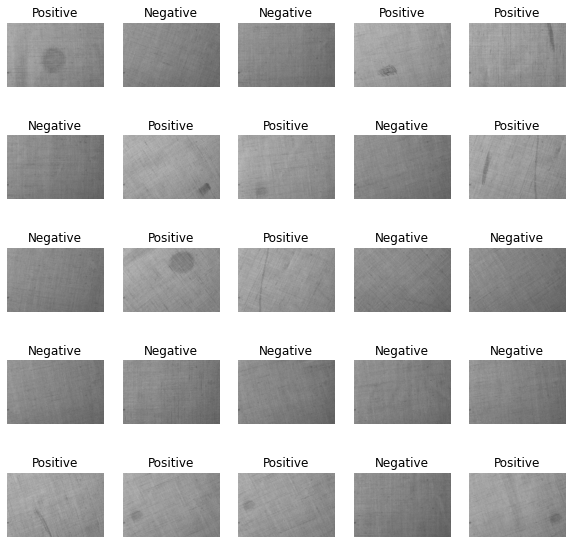

In [0]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)
print (image_batch.shape,label_batch.shape)
# Positive -- Stain
# Negative -- No-Stain

In [0]:
# CNN

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(768, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 766, 510, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 383, 255, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 381, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 190, 126, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 188, 124, 64)      36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1491968)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# removing one hot encoding of label_batch
print (type(image_batch))

<class 'numpy.ndarray'>


In [0]:
# for i in range(len(train_data_gen)):
#   image_batch, label_batch = next(train_data_gen)
label_batch = np.argmax(label_batch, axis=1)
  
history = model.fit(image_batch, label_batch, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 264ms/step - loss: 6.7615 - accuracy: 0.5400
Epoch 2/10
2/2 [==============================] - 1s 277ms/step - loss: 7.7512 - accuracy: 0.5400
Epoch 3/10
2/2 [==============================] - 1s 266ms/step - loss: 7.5554 - accuracy: 0.5400
Epoch 4/10
2/2 [==============================] - 1s 267ms/step - loss: 7.5554 - accuracy: 0.5400
Epoch 5/10
2/2 [==============================] - 1s 276ms/step - loss: 7.7512 - accuracy: 0.5400
Epoch 6/10
2/2 [==============================] - 1s 262ms/step - loss: 7.7512 - accuracy: 0.5400
Epoch 7/10
2/2 [==============================] - 1s 270ms/step - loss: 6.7718 - accuracy: 0.5400
Epoch 8/10
2/2 [==============================] - 1s 271ms/step - loss: 7.1636 - accuracy: 0.5400
Epoch 9/10
2/2 [==============================] - 1s 266ms/step - loss: 7.7512 - accuracy: 0.5400
Epoch 10/10
2/2 [==============================] - 1s 258ms/step - loss: 8.5348 - accuracy: 0.5400


KeyError: ignored

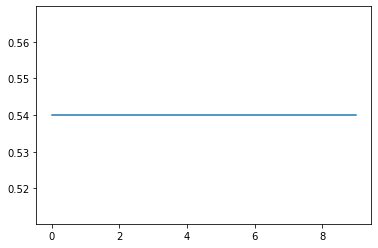

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(image_batch, label_batch, verbose=2)